<div style = 'color:#FF0000; font-size:30px; font-family: Garamond'>
<h1>Mid Hackathon Notebook</h1>
</div>

Author: Hriday Agrawal

## PROBLEM STATEMENT

Content and Problem Statement
 

The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world. 
 
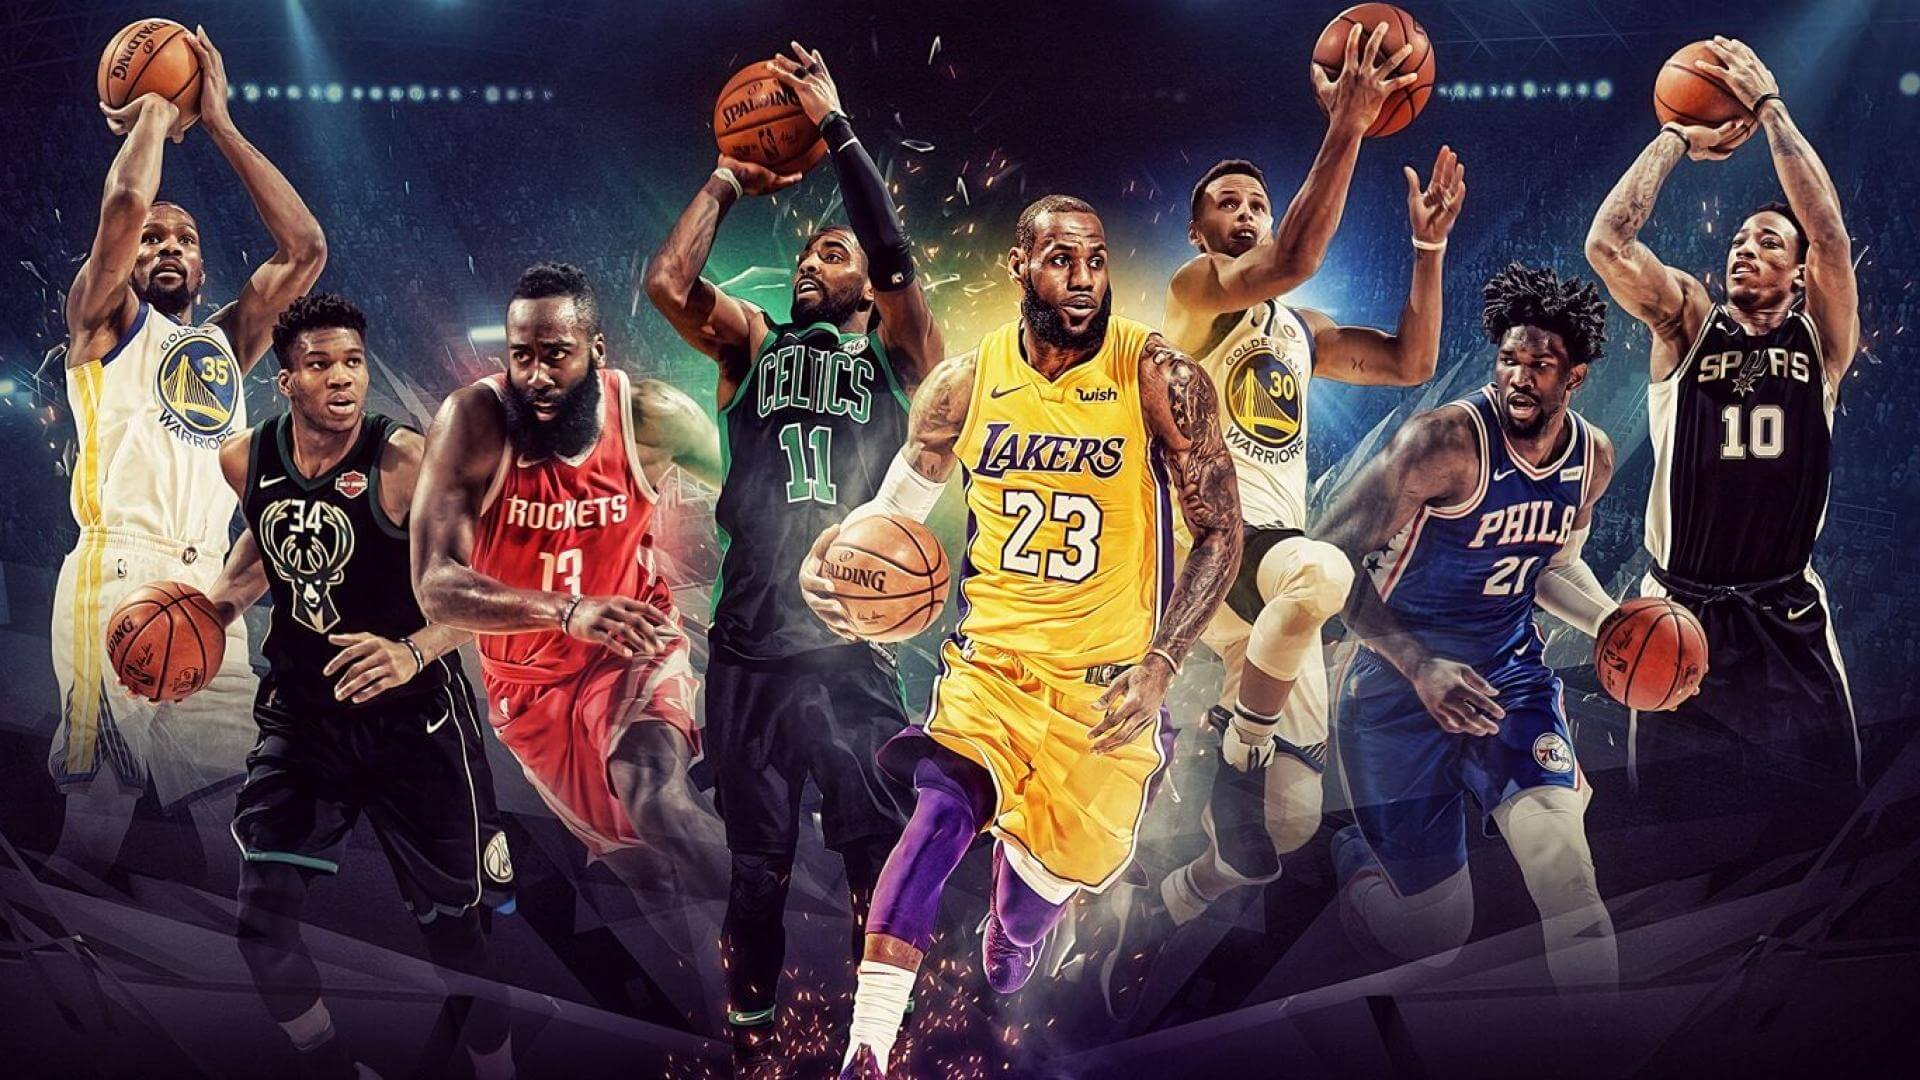

Career longevity is dependent on various factors for any players in all the games and so for NBA Rookies. The factors like games played, count of games played, and other statistics of the player during the game.

## Objective
Using machine learning techniques determine if a player’s career will flourish or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# importing dataset

df_train_full = pd.read_csv('./Train_data.csv')
df_test_full = pd.read_csv('./Test_data.csv')

In [3]:
df_train_full.GP = np.floor(df_train_full.GP)
df_test_full.GP = np.floor(df_test_full.GP)

In [4]:
df_train_full.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

<AxesSubplot:>

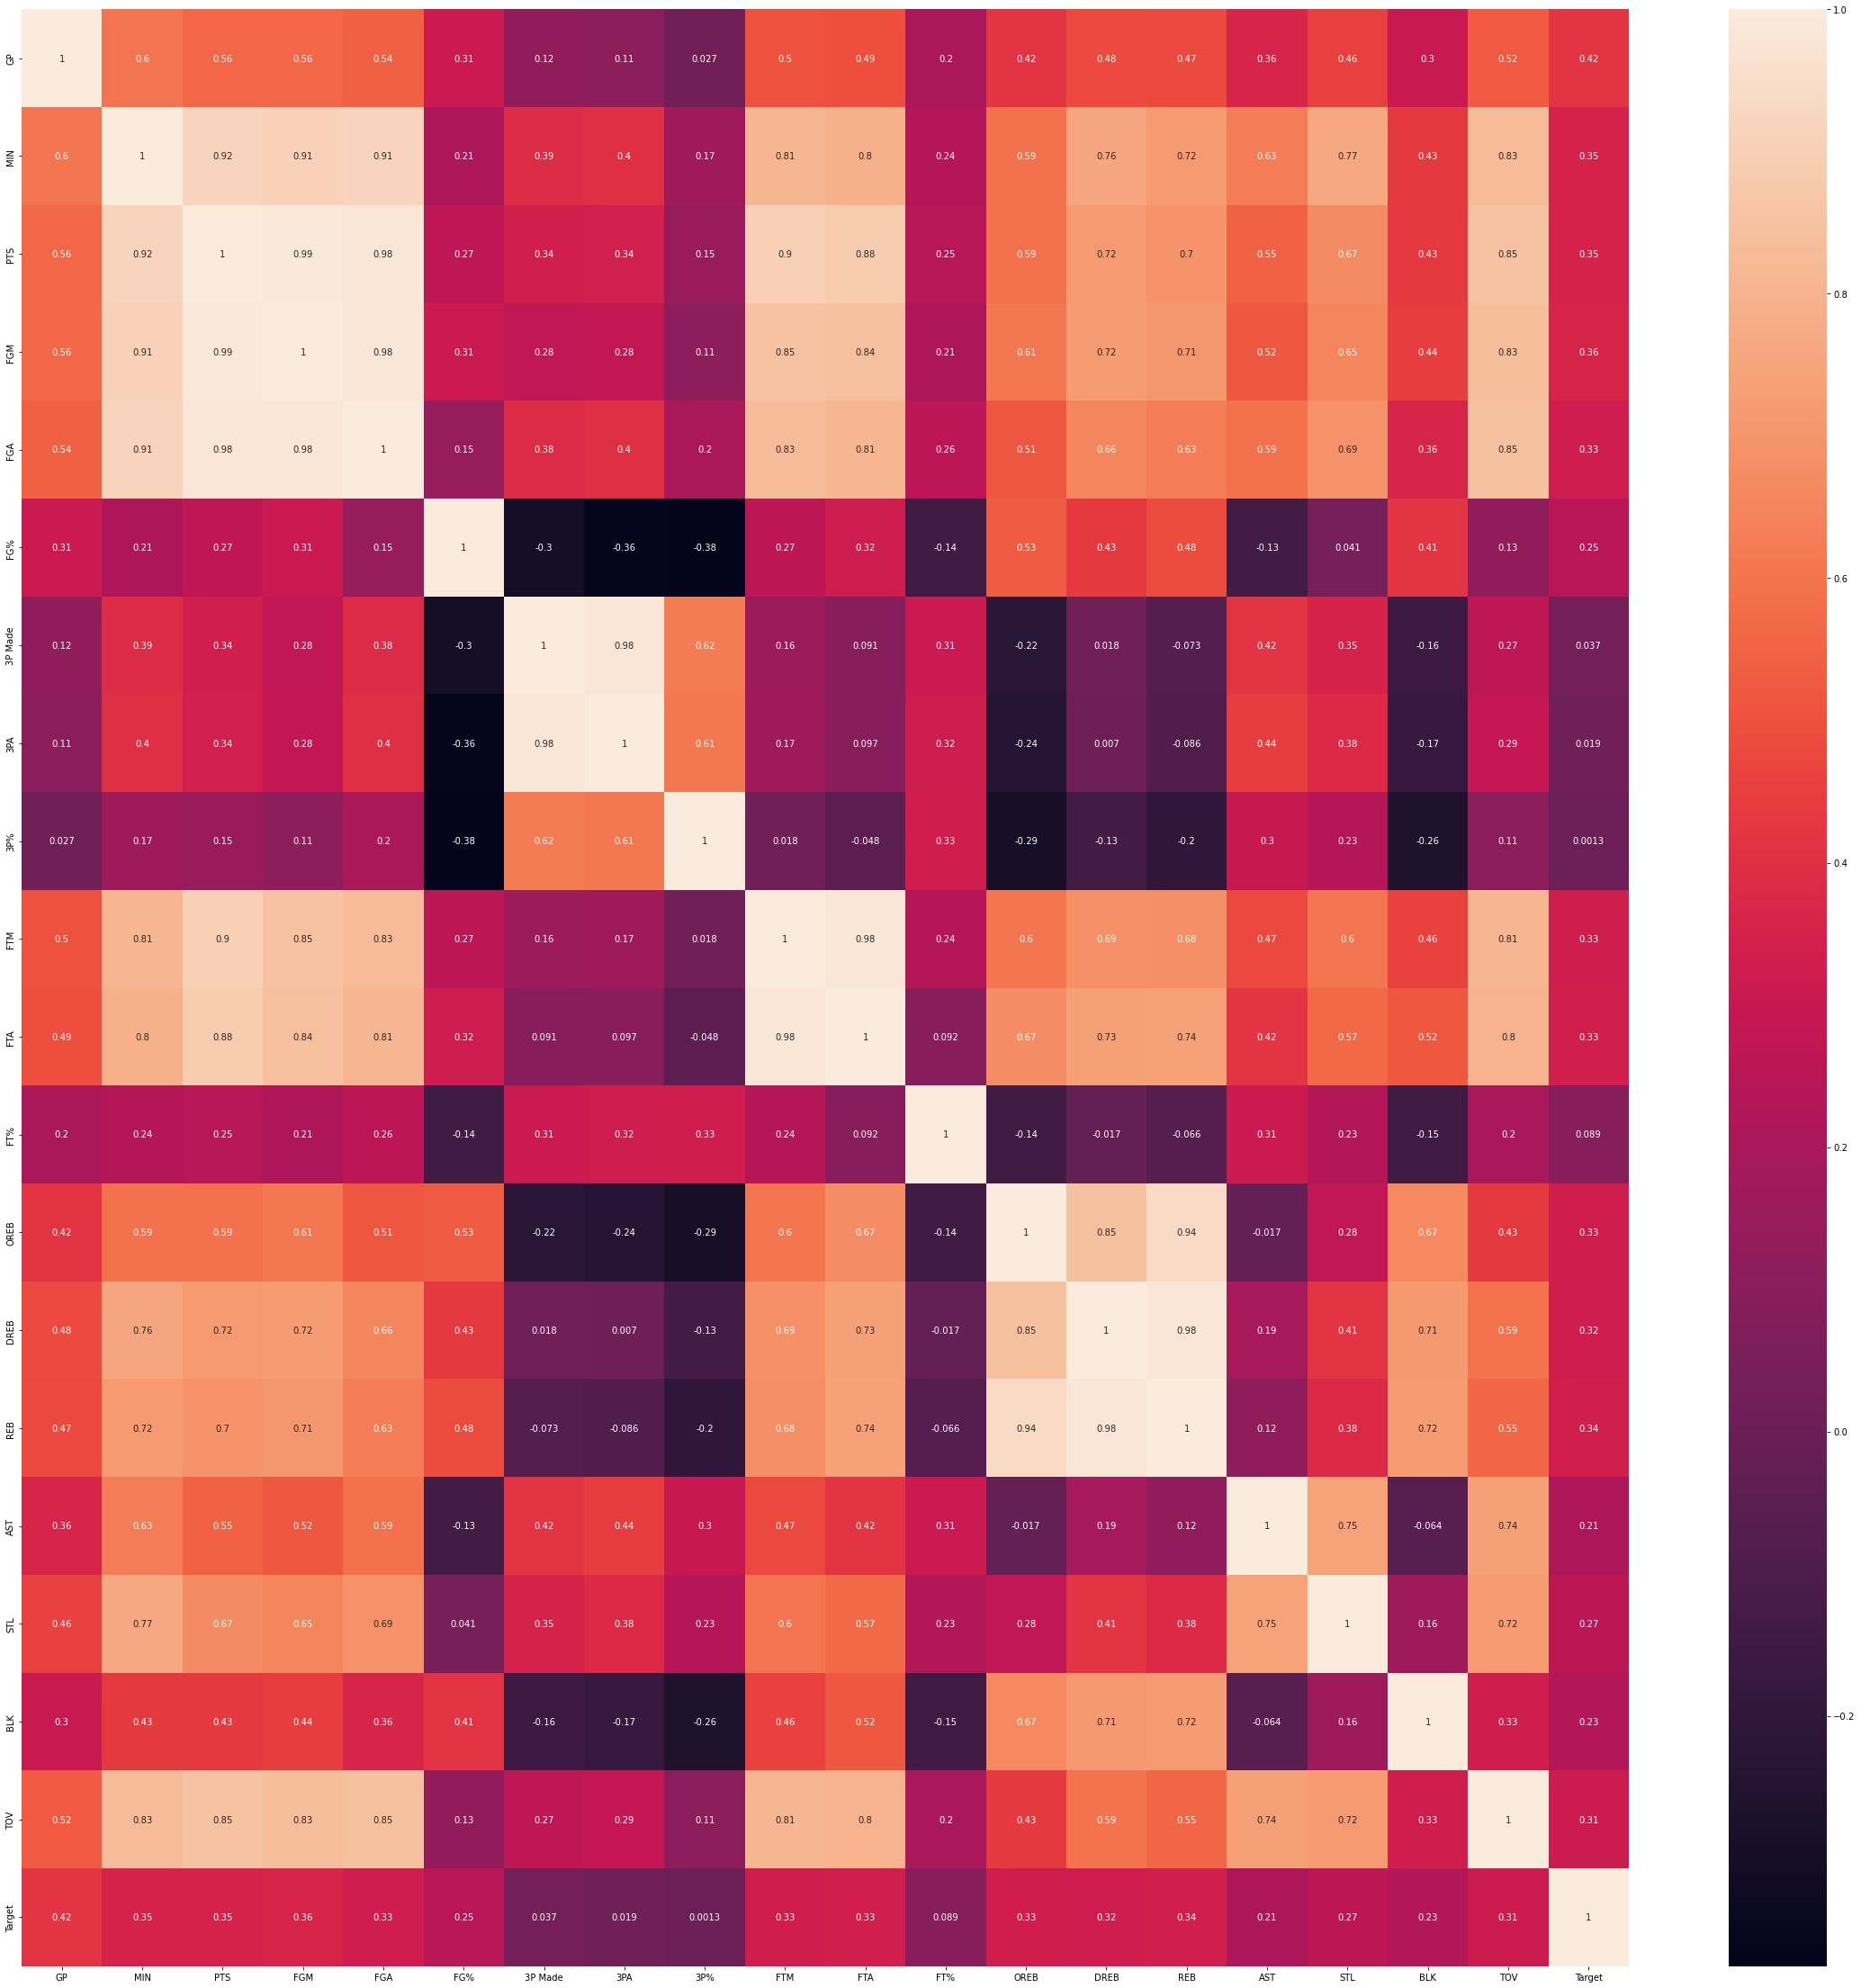

In [5]:
plt.figure(figsize=(40,40))
sns.heatmap(df_train_full.corr(), annot=True)

In [6]:
df_train_full.isna().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
Target     False
dtype: bool

<AxesSubplot:>

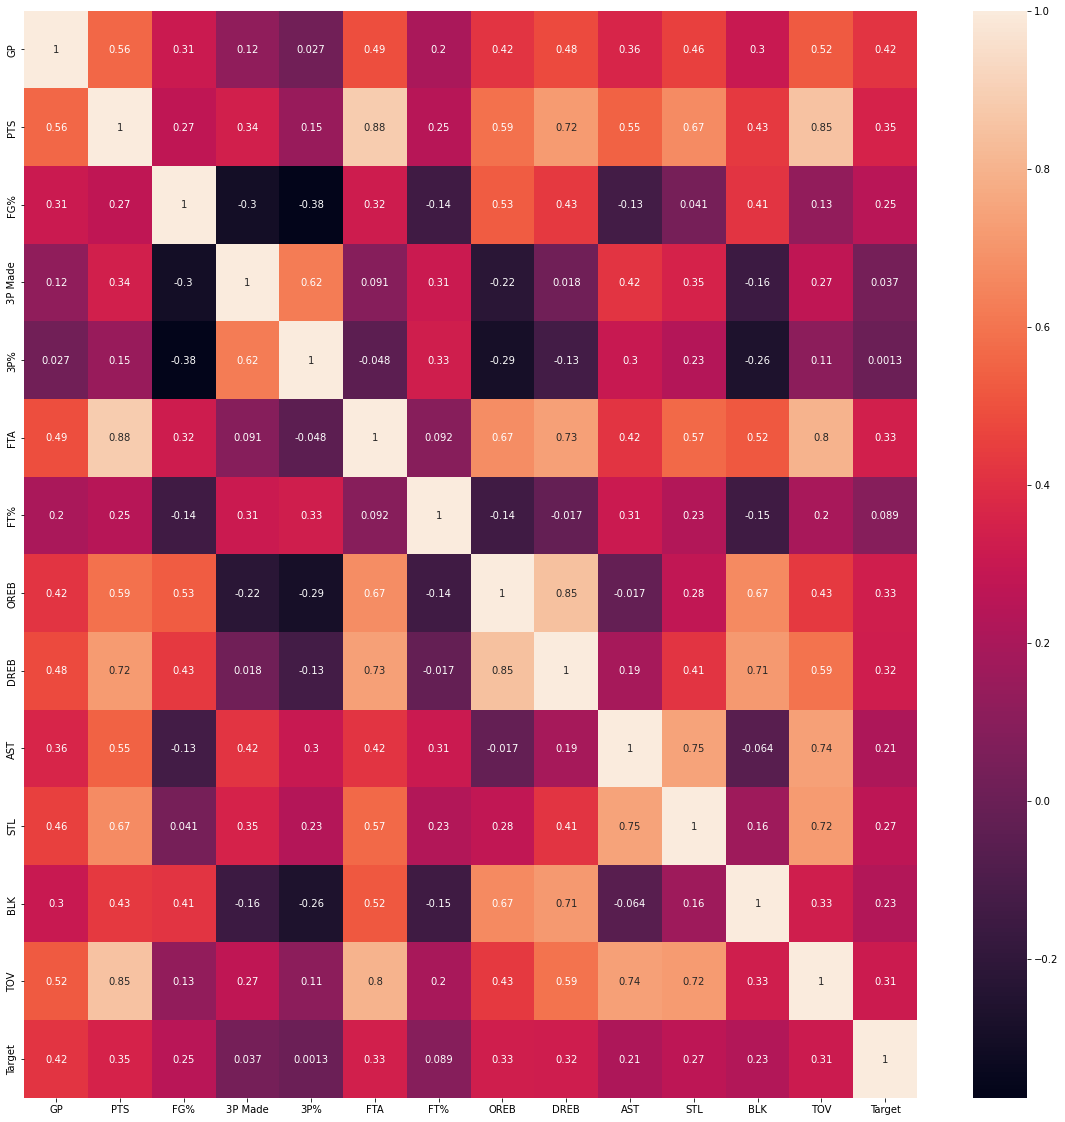

In [7]:
# dropping some highly correlated features from datasets

df_train_full = df_train_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis = 1)
df_test_full = df_test_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis = 1)

plt.figure(figsize=(20, 20))
sns.heatmap(df_train_full.corr(), annot=True)

In [8]:
# splitting training and validation sets

X_train_full = df_train_full.drop(['Target'], axis = 1)
y_train_full = df_train_full['Target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state = 0)

In [9]:
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000)

In [12]:

# choosing best hyperparameters
n_est_list = [5, 50, 500, 1000, 1500]
for i in n_est_list:
    rf = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf.fit(X_train_full, y_train_full)
    preds_new = rf.predict(X_valid)
    print(accuracy_score(y_valid, preds_new))

0.9710144927536232
0.9927536231884058
0.9891304347826086
0.9891304347826086
0.9891304347826086


In [13]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(n_estimators=50, random_state=0)

In [14]:
# testing on validation data, though not needed
preds_new = rf.predict(X_valid)
print(accuracy_score(y_valid, preds_new))

0.9927536231884058


In [15]:
# Getting the final predictions.
preds = rf.predict(df_test_full)
print(preds.shape)
output = pd.DataFrame({'prediction':preds})
output.to_csv('submission.csv', index = False)

(555,)
